#**Importing the Dependencies**

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#**Data Collection and Processing**

In [4]:
fortnite_data = pd.read_excel('/content/Fortnite_players_stats.xlsx')

In [5]:
fortnite_data.head()

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Duos score,Duos top1,Duos kd,...,Trios kd,Trios winRatio,Trios matches,Trios kills,Squads score,Squads top1,Squads kd,Squads winRatio,Squads matches,Squads kills
0,ProspÐµring,2476763,1828,4.37,18.0,10150,36328,4702684,5584,10.71,...,6.65,31.2,783,3584,3640415,5116,6.88,31.7,16131,75787
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,4065613,4141,9.49,...,8.06,19.0,21,137,5275367,4978,10.24,30.3,16433,117327
2,RaÐ¿ger,4519465,4582,9.60,34.0,13488,85481,1137279,1390,7.78,...,4.75,26.4,2711,9477,2745537,4435,8.40,32.9,13494,76065
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,5326457,2249,1.02,...,1.14,8.6,2421,2526,1781544,336,0.87,4.1,8232,6892
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,3692623,5743,11.13,...,24.07,78.5,1146,5920,2795511,3445,7.58,36.2,9524,46068


In [6]:
fortnite_data.tail()

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Duos score,Duos top1,Duos kd,...,Trios kd,Trios winRatio,Trios matches,Trios kills,Squads score,Squads top1,Squads kd,Squads winRatio,Squads matches,Squads kills
1406,im bloom,106294,26,2.03,3.5,736,1440,2208424,1551,2.53,...,2.30,4.4,1284,2822,599549,321,2.86,7.8,4117,10842
1407,Twitch kaOzs_,803918,396,3.42,13.2,3001,8911,890900,739,2.88,...,2.43,12.4,1826,3890,1000305,491,2.91,10.2,4837,12628
1408,slxyher,603939,310,1.69,5.1,6035,9679,432952,442,1.90,...,2.57,8.0,741,1753,2018306,1367,3.34,15.1,9046,25626
1409,RD-Antony,747295,71,1.10,1.9,3763,4048,1010165,851,5.23,...,6.94,35.3,156,701,1392629,904,3.30,16.5,5475,15107
1410,O-HO-HO-HOÇƒ,1378689,161,1.68,2.3,7105,11661,305715,128,2.82,...,2.34,8.1,1450,3122,1158340,380,2.87,8.2,4657,12259


In [7]:
fortnite_data.shape

(1411, 25)

In [8]:
fortnite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           1411 non-null   object 
 1   Solo score       1411 non-null   int64  
 2   Solo top1        1411 non-null   int64  
 3   Solo kd          1411 non-null   float64
 4   Solo winRatio    1411 non-null   float64
 5   Solo matches     1411 non-null   int64  
 6   Solo kills       1411 non-null   int64  
 7   Duos score       1411 non-null   int64  
 8   Duos top1        1411 non-null   int64  
 9   Duos kd          1411 non-null   float64
 10  Duos winRatio    1411 non-null   float64
 11  Duos matches     1411 non-null   int64  
 12  Duos kills       1411 non-null   int64  
 13  Trios score      1411 non-null   int64  
 14  Trios top1       1411 non-null   int64  
 15  Trios kd         1411 non-null   float64
 16  Trios winRatio   1411 non-null   float64
 17  Trios matches 

In [9]:
fortnite_data.isnull().sum()

Player             0
Solo score         0
Solo top1          0
Solo kd            0
Solo winRatio      0
Solo matches       0
Solo kills         0
Duos score         0
Duos top1          0
Duos kd            0
Duos winRatio      0
Duos matches       0
Duos kills         0
Trios score        0
Trios top1         0
Trios kd           0
Trios winRatio     0
Trios matches      0
Trios kills        0
Squads score       0
Squads top1        0
Squads kd          0
Squads winRatio    0
Squads matches     0
Squads kills       0
dtype: int64

In [10]:
fortnite_data.describe()

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Duos score,Duos top1,Duos kd,Duos winRatio,...,Trios kd,Trios winRatio,Trios matches,Trios kills,Squads score,Squads top1,Squads kd,Squads winRatio,Squads matches,Squads kills
count,1.411000e+03,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1.411000e+03,1411.000000,1411.000000,1411.000000,...,1411.000000,1411.000000,1411.000000,1411.000000,1.411000e+03,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000
mean,1.074535e+06,325.347980,1.815620,4.845641,6833.064493,11709.965273,1.401017e+06,837.332388,2.486960,11.218285,...,2.454826,10.355067,1317.708717,2765.390503,1.036656e+06,418.593905,2.055245,7.050886,6078.072289,11427.000709
std,8.661136e+05,517.662948,1.157741,5.303791,5308.828251,11436.919975,9.802145e+05,726.787557,1.596519,7.407604,...,1.762049,8.057136,1061.394235,2570.721326,5.148333e+05,419.426561,1.185026,5.671649,3094.949156,8354.029850
min,4.453000e+03,0.000000,0.080000,0.000000,30.000000,28.000000,6.106000e+03,0.000000,0.080000,0.000000,...,0.000000,0.000000,1.000000,0.000000,2.819000e+03,0.000000,0.170000,0.000000,33.000000,35.000000
25%,4.355170e+05,65.000000,1.050000,1.600000,2860.500000,3777.500000,5.887485e+05,324.500000,1.400000,6.000000,...,1.500000,5.300000,515.500000,908.500000,7.147400e+05,172.000000,1.230000,3.200000,3994.000000,5741.500000
50%,8.991010e+05,160.000000,1.480000,2.900000,5683.000000,8353.000000,1.186470e+06,686.000000,2.090000,9.600000,...,2.100000,8.400000,1032.000000,2048.000000,9.934750e+05,311.000000,1.760000,5.300000,5740.000000,9747.000000
75%,1.496288e+06,363.500000,2.195000,6.100000,9520.500000,15788.500000,1.997756e+06,1098.000000,3.040000,14.500000,...,2.910000,12.800000,1890.000000,3857.500000,1.304656e+06,533.000000,2.510000,9.050000,7781.000000,15065.000000
max,6.772116e+06,6480.000000,9.600000,44.100000,36487.000000,89023.000000,6.438735e+06,7594.000000,14.000000,56.200000,...,24.070000,78.500000,6441.000000,16021.000000,5.275367e+06,5116.000000,10.240000,39.300000,28805.000000,117327.000000


In [11]:
fortnite_Data = fortnite_data.drop(columns='Player',axis=1)

In [12]:
print(fortnite_Data)

      Solo score  Solo top1  Solo kd  Solo winRatio  Solo matches  Solo kills  \
0        2476763       1828     4.37           18.0         10150       36328   
1         439562       1694     8.71           29.1          5817       35895   
2        4519465       4582     9.60           34.0         13488       85481   
3         752869        121     0.84            3.3          3687        3005   
4        1136282       1327     6.32           30.0          4429       19591   
...          ...        ...      ...            ...           ...         ...   
1406      106294         26     2.03            3.5           736        1440   
1407      803918        396     3.42           13.2          3001        8911   
1408      603939        310     1.69            5.1          6035        9679   
1409      747295         71     1.10            1.9          3763        4048   
1410     1378689        161     1.68            2.3          7105       11661   

      Duos score  Duos top1

In [13]:
Y=fortnite_Data['Solo score']
Y.head()

0    2476763
1     439562
2    4519465
3     752869
4    1136282
Name: Solo score, dtype: int64

In [14]:
X=fortnite_Data[['Solo top1','Solo kd','Solo winRatio','Solo matches','Solo kills']]
X.head()

,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills
0,1828,4.37,18.0,10150,36328
1,1694,8.71,29.1,5817,35895
2,4582,9.60,34.0,13488,85481
3,121,0.84,3.3,3687,3005
4,1327,6.32,30.0,4429,19591


In [15]:
Duplicate_Input=X

In [16]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [17]:
X[:5]

array([[ 2.90379056,  2.20713079,  2.48105976,  0.62501768,  2.1532688 ],
       [ 2.64484309,  5.95713983,  4.57464442, -0.19145934,  2.11539554],
       [ 8.22574074,  6.7261509 ,  5.49883944,  1.25400459,  6.45254056],
       [-0.39489098, -0.84299177, -0.29152532, -0.59282007, -0.76139831],
       [ 1.93563622,  3.89204269,  4.74439452, -0.45300332,  0.68933148]])

#**Splitting Data into Training data & Test data**

In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
print(type(X_train))
print(Y_train.shape)
print(X_test.shape)
print(Y_train[:10])

<class 'numpy.ndarray'>
(1128,)
(283, 5)
1263    1110455
146      893152
1077     914180
323     1596293
141     1821087
665      337919
1007     436054
590     1672679
67       492893
1265     644458
Name: Solo score, dtype: int64


#**Model Evaluation**

###**Accuracy Score**

In [20]:
from sklearn.linear_model import LogisticRegression
random_forest_regressor=RandomForestRegressor()
random_forest_regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [21]:
random_forest_regressor.score(X_train,Y_train)

0.9772978094450255

In [22]:
print(X_train[:5])
print(Y_train[:5])

[[-0.56301359 -0.85163235 -0.83849789  0.13792027 -0.47870456]
 [-0.38136388 -0.35047907 -0.49899768 -0.1976776  -0.32738642]
 [-0.22483593 -0.29863562 -0.49899768  0.47521403  0.15377025]
 [-0.47412118 -0.93803809 -0.78191452  0.80139028 -0.31689037]
 [ 0.35296476  1.58500947  0.33089174  0.15638663  1.25725554]]
1263    1110455
146      893152
1077     914180
323     1596293
141     1821087
Name: Solo score, dtype: int64


In [23]:
user_input=np.array([[1828,	4.37,	18.0,	10150,	36328]])
new_X=np.append(Duplicate_Input,user_input,axis=0)
new_X.shape

(1412, 5)

In [24]:
#Normalizing user input
new_arr=scaler.fit_transform(new_X)
get_value=new_arr[1411]

In [25]:
score=random_forest_regressor.predict([get_value])
print(score[0])

2372349.99


In [26]:
if (score[0]>=0 and score[0]<=2255887.67):
  print('Matchmaking in Open League...')
elif (score[0]>2255887.67 and score[0]<=4511775.34):
  print('Matchmaking in Contender League...')
elif (score[0]>4511775.34):
  print('Matchmaking in Champion League...')

Matchmaking in Contender League...


In [27]:
predictions=random_forest_regressor.predict(X_test)
predictions

array([ 821507.52, 1965234.05, 1052665.11,  384146.86,  834461.  ,
        176827.86, 1542973.56,  118120.73,  897172.52,  945036.88,
       1310052.32, 1055840.62, 1171418.74,  244019.12, 1438364.81,
        598822.81,  916233.83,  347997.23, 1924110.37,  857926.02,
       1010464.13, 1111833.23,  656591.42,  427924.34,  350688.5 ,
       1180428.34, 3310189.6 , 2635875.51,  623923.83,  910246.52,
        734612.46,  350399.05,  850819.89,  445083.67,  201886.62,
       1317784.69, 1371033.77, 1611105.76,  916592.05,   69357.9 ,
       1144239.12, 1299297.48,  406727.73,  733924.98,  616919.56,
       1574438.28,  642545.85,  615016.76,  430753.97, 1913207.18,
       1011127.68, 2416281.6 , 1087761.27,  981141.96, 1427570.38,
       1538357.6 , 1475169.65,  917562.75, 1923411.1 , 1264191.22,
       3172364.07, 1301462.03,  772388.16, 1290867.48, 1098980.08,
       1177286.4 , 1534052.44, 1962843.51,  572120.7 ,  978720.63,
        178244.03,   98818.93, 1636795.66,  307836.87,  468217

#**Visualization in accordance with the values predicted**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


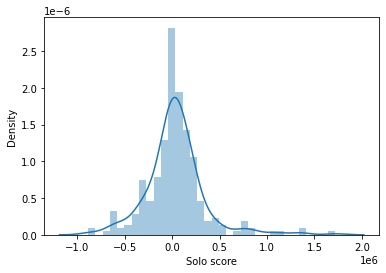

In [28]:
sns.distplot(Y_test-predictions)

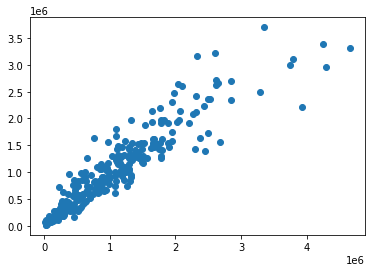

In [29]:
plt.scatter(Y_test,predictions)